# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


In [446]:
import numpy as np
import random as rd

# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


In [447]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

Populating the interactive namespace from numpy and matplotlib


/Users/yvesabraham/opt/miniconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['uniform']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [448]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

In [449]:
def Xi():
    u = np.random.uniform(0,1)
    return (u>=1/2) - (u<1/2)

def Ui():
    return np.random.uniform()

In [459]:
'''
def Z_tilde(n,t):
    Z = [0] # initialisation artificielle
    for i in range (1,n+1):
        res = ((t<=Ui())-(t>Ui())) * Xi() # Xi() si t > u et -Xi sinon
        Z.append(Z[-1] + res)
    Z = Z[1:] # on enlève le premier élément qui n'était pas un des termes de Zn
    Z = [z/np.sqrt(i+1) for i, z in enumerate(Z)]
    return Z
'''
def Z_tilde(n,t):
    Z = 0
    for i in range (1,n+1):
        Z += int(((t<=Ui()))-int((t>Ui()))) * Xi() # Xi() si t > u et -Xi sinon
    return Z / np.sqrt(n)

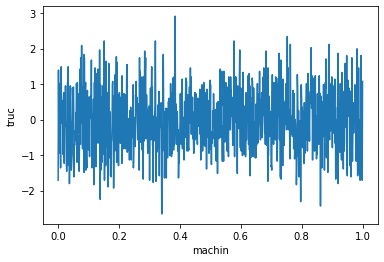

In [460]:
T = np.linspace(0, 1, 1000)
Z_T = [Z_tilde(1000, t) for t in T]
plt.plot(T, Z_T)
plt.xlabel('machin')
plt.ylabel('truc')
plt.show()

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

## question 2

***calcul de l'espérance de*** $\tilde{Z}_t^{(n)}$

 Par linéarité de l'espérance, 
$$
\mathbb{E}(\tilde{Z}_t^{(n)}) = \frac{1}{n} \sum_{i = 1}^n\mathbb{E} \bigg( X_i\big(\mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t) \big) \bigg)
$$

 Or, les variables aléatoires $(X_i)_{i \in \mathbb{N^*}}$ et $(U_i)_{i \in \mathbb{N^*}}$ sont idépendantes et suivent respectivement les mêmes lois que $X_1$ et $U_1$. On a donc :

$$
\mathbb{E}(\tilde{Z}_t^{(n)}) = \frac{n}{\sqrt{n}} \mathbb{E} \bigg( X_1\big(\mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t) \big) \bigg)
$$

Par ailleurs, $ \mathbb{1}_{[0, U_1]}(t)  = f (U_1) $ avec 

$$\begin{array}{l|rcl}
f : & [0,1] & \longrightarrow & {0, 1} \\
    & u & \longmapsto & \mathbb{1}_{[0, u]}(t) \end{array}$$

qui est mesurable. Ainsi, par transfert d'indépendance, $f(U_1)$ et $X_1$ sont indépendantes. De même, $\mathbb{1}_{]U_1,1]}(t)$ et $X_1$ sont indépendantes. Il vient donc :

$$\begin{aligned}
 \mathbb{E}(\tilde{Z}_t^{(n)}) & = \sqrt{n} \: \mathbb{E}(X_1) \times \mathbb{E}((\mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t) ) 
\\ & = 0
\end{aligned}$$

car $X$ est centrée. Ainsi, $\mathbb{E}\big(\tilde{Z}_t^{(n)}\big) = 0$.



***calcul de la variance de*** $\tilde{Z}_t^{(n)}$

Comme montré précédement, les variables aléatoires $X_i \big( \mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1])} (t)\big)$ sont indépendantes, on a donc : 

$$\begin{aligned}
 \mathbb{V}(\tilde{Z}_t^{(n)}) &= \frac{1}{n} \sum_{i = 1}^n \mathbb{V} \bigg( X_i \big( \mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t)\big) \bigg)
 \\ & = 
 \mathbb{V} \bigg( X_1 \big( \mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t)\big) \bigg)
 \\ & = 
 \mathbb{E}(X_1^2)\mathbb{E}\bigg(\big( \mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t)\big)^2\bigg) - \mathbb{E}(X_1)^2 \mathbb{E}\big( \mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t)\big)^2 && \text{par indépendance}
\\ & = \mathbb{E}\bigg(\big( \mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t)\big)^2\bigg) && \text{ car $\mathbb{E}(X_1) = 0$ et $\mathbb{E}(X_1^2) = 1$}
\end{aligned}$$

Par ailleurs :

$$\begin{aligned}
 \big( \mathbb{1}_{[0, U_1]} (t) - \mathbb{1}_{]U_1, 1]} (t)\big)^2 & = \mathbb{1}_{[0, U_1]} (t)^2 + \mathbb{1}_{]U_1, 1]} (t)^2 - 2 \times \mathbb{1}_{[0, U_1]} (t) \: \mathbb{1}_{]U_1, 1]} (t) 
 \\ & = 
 \mathbb{1}_{[0, U_1]} (t) + \mathbb{1}_{]U_1, 1]} (t)
 \\ & = 
 \tilde{1}
\end{aligned}$$

Ainsi, $\mathbb{V}\big(\tilde{Z}_t^{(n)}\big)$ = 1


***convergence simple de*** $t \longmapsto \tilde{Z}^{(n)}_t$

Soit $t \in [0, 1]$. Nous avons vu précédemment que les varaibles aléatoires $\bigg(X_i \big( \mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t)\big) \bigg)_{i \in \mathbb{N}^{*}}$ sont indépendantes et de même loi. Ainsi, d'après le théorème central limite, 

$$\frac {\tilde{Z}^{(n)}_t  - \mathbb{E}(\tilde{Z}^{(n)}_t)}{\sqrt {\mathbb{V}\big(\tilde{Z}^{(n)}_t\big)}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)
$$

D'après ce  qui précède, on a donc : 

$$
\tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)
$$

***Vérification expérimentale***

On réalise 1000 tirages de $\tilde{Z}^{(n)}_t$ pour $n = 2000$ et pour $t$ parcourant ${0, 0.25, 0.5, 0.75, 1}$.

In [ ]:
m = 0 
sigma = 1
def norm(x):
    return np.exp(-(x - m)**2 / (2 * sigma ** 2 )) / (np.sqrt(2 * np.pi) * sigma)

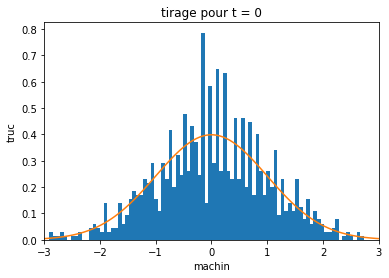

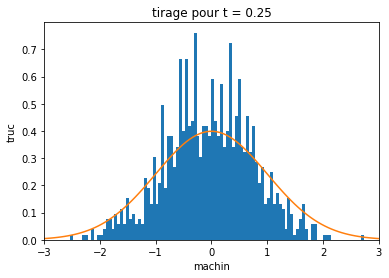

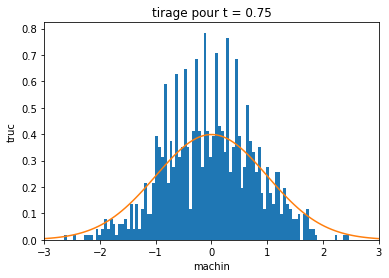

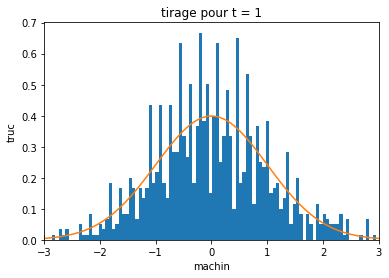

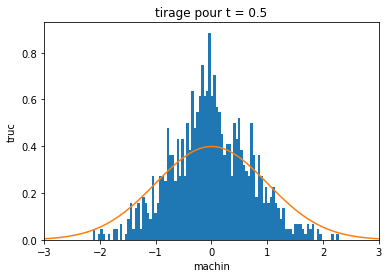

In [575]:
tab_t = {0, 0.25, 0.5, 0.75, 1}
n = 2000

mu = 0
variance = 1

sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)


for t in tab_t:
    plt.hist([Z_tilde(n, t) for _ in range(1000)], bins = 100, density=True)
    plt.xlabel('machin')
    plt.ylabel('truc')
    plt.xlim(mu - 3*sigma, mu + 3*sigma)
    plt.title(f'tirage pour t = {t}')
    plt.plot(x, sps.norm.pdf(x, mu, sigma))
    plt.show()

3. Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

## question 3

On a : 

$$
\begin{aligned}
 \tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h} & = \frac{1}{n} \sum_{i=1}^n X_i \bigg( \mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t) - \big( \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{]U_i, 1]} (t + h) \big)\bigg)
\end{aligned}
$$

On pose $ A_i := \mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t) - \big( \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{]U_i, 1]} (t + h) \big) $

Ainsi, 

$$
\begin{aligned}
 \mathbb{E}\bigg( \big( \tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h} \big)^2\bigg) & = \frac{1}{n} \mathbb{E} \bigg( \sum_{i = 1}^{n} \sum_{j = 1}^{n} X_i X_j A_i A_j \bigg)
 \\ & = 
 \frac{1}{n} \sum_{i = 1}^{n} \sum_{j = 1}^{n} \mathbb{E} \big(X_i X_j A_i A_j\big)
 \\ & = 
 \frac{1}{n} \sum_{i = 1}^{n} \sum_{j = 1}^{n} \mathbb{E} \big(X_i X_j \big) \mathbb{E} \big( A_i A_j\big) && \text{par indépendance}
 \\ & = 
 \frac{1}{n} \sum_{i = 1}^{n} \mathbb{E} \big( A_i^2\big) && \text{car $\mathbb{E}\big(X_i X_j) = \delta_{i, j}$ pour tout $(i, j) \in \{ 1, \dots, n\}$}
 \\ & = 
 \mathbb{E} \big( A_i^2\big)
\end{aligned}
$$

On a : 

$$
\begin{aligned}
\bigg(\mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t) - \big( \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{]U_i, 1]} (t + h) \big)\bigg)^2 & = \big(\mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t)\big)^2 + \big( \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{]U_i, 1]} (t + h) \big)^2 - 2 \times \big(\mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t)\big) \: \big( \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{]U_i, 1]} (t + h) \big)
\\ & = 
\tilde{2} - 2 \times \big(\mathbb{1}_{[0, U_i]} (t) - \mathbb{1}_{]U_i, 1]} (t)\big) \: \big( \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{]U_i, 1]} (t + h) \big) && \text{d'après un calcul précédent}
\\ & = 
\tilde{2} - 2 \times \bigg( \mathbb{1}_{[0, U_i]} (t) \: \mathbb{1}_{[0, U_i]} (t + h) - \mathbb{1}_{[0, U_i]} (t) \: \mathbb{1}_{]U_i, 1]} (t + h) - \mathbb{1}_{]U_i, 1]} (t) \mathbb{1}_{[0, U_i]} (t + h) + \mathbb{1}_{]U_i, 1]} (t) \: \mathbb{1}_{]U_i, 1]} (t + h)\bigg)
\\ & = 
\tilde{2} - 2 \times B_i && \text{pour alléger les notations}
\end{aligned}
$$

On opère les simplications suivantes : 

$$
\begin{aligned}
\mathbb{1}_{[0, U_i]} (t) \: \mathbb{1}_{[0, U_i]} (t + h) & = \mathbb{1}_{[0, U_i]} (t + h)
\\
\mathbb{1}_{]U_i, 1]} (t) \: \mathbb{1}_{]U_i, 1]} (t + h) & = \mathbb{1}_{]U_i, 1]} (t)
\\
\mathbb{1}_{]U_i, 1]} (t) \mathbb{1}_{[0, U_i]} (t + h) & = \tilde{0}
\end{aligned}$$

et finalement, 

$$\begin{aligned}
\mathbb{1}_{[0, U_i]} (t) \: \mathbb{1}_{]U_i, 1]} (t + h) & = \mathbb{1}_{[0, U_i]} (t) \big( \tilde{1} - \mathbb{1}_{[0, U_i]} (t + h) \big)
\end{aligned}$$

On a alors : 

$$
\begin{aligned}
 \mathbb{E}(B_i) & = \mathbb{E}\big( \mathbb{1}_{[0, U_i]} (t + h)\big) + \mathbb{E}\big( \mathbb{1}_{]U_i, 1]} (t)\big) - \mathbb{E}\bigg( \mathbb{1}_{[0, U_i]} (t) \big( \tilde{1} - \mathbb{1}_{[0, U_i]} (t + h) \big)\bigg)
 \\ & = 
 (t + h) + (1 - t) - \mathbb{E}\big( \mathbb{1}_{[0, U_i]} (t)\big) + \mathbb{E} \big( \mathbb{1}_{[0, U_i]} (t) \: \mathbb{1}_{[0, U_i]} (t + h) \big)
 \\ & = 
 (t + h) + (1 - t) - t + \mathbb{E} \big(\mathbb{1}_{[0, U_i]} (t + h) \big)
 \\ & = 
 (t + h) + (1 - t) - t + (t + h)
 \\ & = 
 1 - 2h
 
\end{aligned}
$$

Fianlement, on a  : 

$$
\begin{aligned}
\mathbb{E}\bigg( \big( \tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h} \big)^2\bigg) & = \mathbb{E} (\tilde{2} - 2 \times B_i)
\\ & = 
\tilde{2} - 2 \times \mathbb{E}(B_i)
\\ & = 
2 - 2 \times ( 1 - 2h) 
\\ & =
4h
\end{aligned}
$$

Soit encore : 

$$
\frac{1}{2} \: \mathbb{E}\bigg( \big( \tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h} \big)^2\bigg) = 2h
$$

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

In [453]:
def alpha():
    return np.pi * np.random.uniform()

def position():
    return np.random.uniform(-np.sqrt(2), np.sqrt(2))

In [577]:
int(False)

0

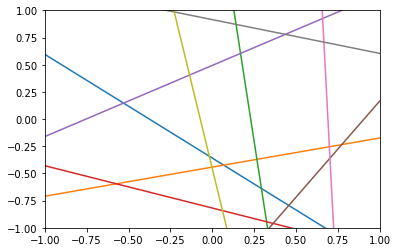

In [563]:
for _ in range(10):
    a = alpha()
    p = position()
    X = np.linspace(-1, 1, 1000)
    Y = (p - X * np.cos(a))/np.sin(a)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.plot(X, Y, label=f"a = {a}, p = {p}")
plt.show()

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

In [610]:
def Domain(alpha, position, x):
    size = len(x)
    mesh = np.meshgrid(x, 1/2 - x, indexing='ij')
    X, Y = mesh
    res = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if X[i, j] * np.cos(a) + Y[i, j] * np.sin(a) <= p :
                res[i, j] = 1
            else: 
                res[i, j] = -1
    return (x, x, res)

/var/folders/2l/lxmwy58539l8c1f40855xp8c0000gn/T/ipykernel_30622/745965687.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*Domain(a, p, x))


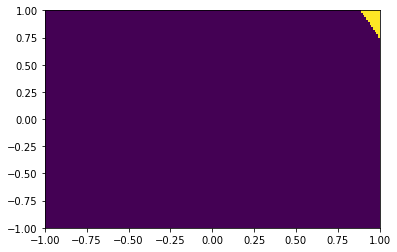

In [676]:
a, p = alpha(), position() 
dim = 200
x = np.linspace(-1, 1, dim)

plt.pcolormesh(*Domain(a, p, x))
plt.show()

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

## question 3

On réutilise le code précédent en générant $n = 100, 1000$ et $10000$ droites et en attribuant à chaque fois la valeur aléatoire `Xi()` au domaine suprérieur et `-Xi()` au domaine inférieur.

/var/folders/2l/lxmwy58539l8c1f40855xp8c0000gn/T/ipykernel_30622/4006125300.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, x, result)


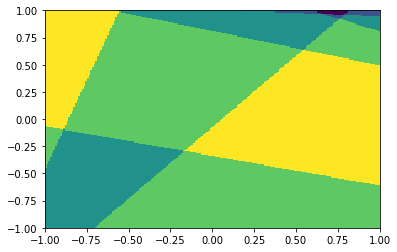

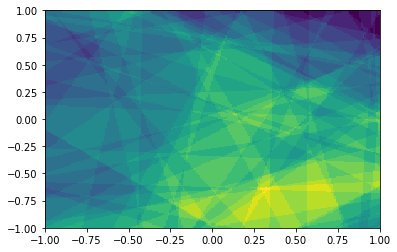

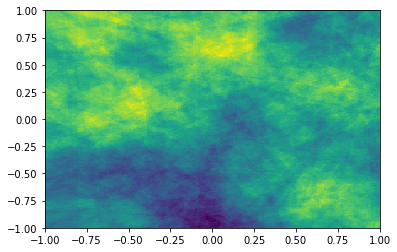

In [684]:
dim = 200
x = np.linspace(-1, 1, dim)
n_tab = [10, 100, 1000]

for n in n_tab:
    result = np.zeros((dim, dim))
    for _ in range(n):
        a, p = alpha(), position()
        _, _, z = Domain(a, p, x)
        result += Xi() * z
    plt.pcolormesh(x, x, result)
    plt.show()




4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?